# **Predictive Analytics for Identifying High-Risk Employees for Turnover Based on Compensation Factors**
## **Project Overview**
- **Author**: Zain Nizar Yousaf
- **Date**: 2024


### **Introduction to the Project**
The goal of this project is to predict high-risk employees for turnover based on compensation factors, such as salary, overtime, bonuses, and other compensation-related data. 
High turnover can be costly for organizations, so predictive analytics will be used to identify employees most likely to leave, allowing for targeted interventions to retain talent.


### **Goal of the Project**
The main goal of this project is to create a model that predicts employees who are at risk of leaving, based on compensation-related factors.

Key objectives:
- **Predict high-risk employees**: We want to identify employees who are likely to leave.
- **Target interventions**: Once we identify the high-risk employees, we can suggest ways to retain them.
- **Optimize compensation**: This model will help in making decisions about compensation and benefits.

Key metrics for performance evaluation:
- **Accuracy**: How well the model predicts turnover.
- **Precision**: How often the model's positive predictions (employee turnover) are correct.
- **Recall**: How many actual turnovers were caught by the model.
- **F1-Score**: A balance between precision and recall.



### **Data Story**
The dataset we’re using contains information on employees such as their:
- **Personal Information**: Employee name (but we won’t use it for predictions).
- **Job Information**: Role, department, and workgroup.
- **Compensation Data**: Salary, overtime pay, longevity pay, etc.
- **Turnover**: Whether the employee stayed or left (our target variable).

The goal is to analyze these features to see which compensation factors are related to turnover and predict which employees might leave.



In [14]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\ZAIN NIZAR YOUSAF\\Downloads\\employee(in).csv")

# Display the first few rows of the dataset
df.head()


,Person Name,Organization,Job,Work Group,Gross Wages,Base Salary,Longevity Pay,Overtime,Other,Seperation Pay,Annual Buybacks,PERS Contributions,ER Paid,Other Benefits,Year Ending
0,"Amis, Beatrice J.",PN - Neighborhood Services,Front Desk/Cashier,HRLY,"$8,122.36","$8,122.36",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$1,218.35",12/31/2012 0:00
1,"Blight, Linda A.",PN - Neighborhood Services,Instructor 3,HRLY,"$3,516.25","$3,516.25",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$527.44,12/31/2012 0:00
2,"Bowden, Tim",PW - Environmental,Sr Maintenance Mechanic,CEA,"$86,965.55","$76,514.36","$7,651.57",$127.02,$125.00,$0.00,"$2,547.60","$21,235.98",$0.00,"$14,349.32",12/31/2012 0:00
3,"Burton, Robert",PN - Parks & Recreation,Monitor,HRLY,"$4,232.29","$4,232.29",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$634.84,12/31/2012 0:00
4,"Cisneros, Alejandro",PN - Parks & Recreation,Instructor 3,HRLY,"$1,120.00","$1,120.00",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$168.00,12/31/2012 0:00


In [24]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("C:\\Users\\ZAIN NIZAR YOUSAF\\Downloads\\employee(in).csv")

# Step 1: Remove non-numeric characters from specific columns (e.g., "$" and ",")
columns_to_convert = ['Gross Wages', 'Base Salary', 'Longevity Pay', 'Overtime', 
                      'Other', 'Seperation Pay', 'Annual Buybacks', 
                      'PERS Contributions', 'ER Paid']

# Clean columns by removing '$' and ',' characters
for col in columns_to_convert:
    # Remove dollar signs, commas, and any other non-numeric characters
    df[col] = df[col].replace({'\$': '', ',': ''}, regex=True)
    # Convert to numeric, invalid parsing will be turned into NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 2: Replace 0.00 values with random numbers
def replace_zero_with_random(df):
    for column in df.columns:
        if df[column].dtype in [np.float64, np.int64]:
            # Replace 0.00 values with random numbers
            df[column] = df[column].replace(0.00, np.random.randint(1, 101))
    
    return df

# Apply the function to replace 0.00 with random numbers
df = replace_zero_with_random(df)

# Step 3: Re-add the '$' symbol and format the numbers (for columns to be presented as currency)
for col in columns_to_convert:
    df[col] = df[col].apply(lambda x: f'${x:,.2f}' if pd.notnull(x) else x)

# Step 4: Check the data types of the columns
print("\nData types of columns:")
print(df.dtypes)

# Step 5: Verify that missing values are filled
print("\nMissing values after imputation:")
print(df.isnull().sum())

# Display the updated dataframe
df.head()


<>:15: SyntaxWarning: invalid escape sequence '\$'
<>:15: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ZAIN NIZAR YOUSAF\AppData\Local\Temp\ipykernel_18524\2729726845.py:15: SyntaxWarning: invalid escape sequence '\$'
  df[col] = df[col].replace({'\$': '', ',': ''}, regex=True)



Data types of columns:
Person Name           object
Organization          object
Job                   object
Work Group            object
Gross Wages           object
Base Salary           object
Longevity Pay         object
Overtime              object
Other                 object
Seperation Pay        object
Annual Buybacks       object
PERS Contributions    object
ER Paid               object
Other Benefits        object
Year Ending           object
dtype: object

Missing values after imputation:
Person Name               0
Organization              0
Job                       0
Work Group                0
Gross Wages               4
Base Salary              11
Longevity Pay          6745
Overtime               5905
Other                  4239
Seperation Pay        10682
Annual Buybacks        7313
PERS Contributions     6648
ER Paid                3253
Other Benefits            0
Year Ending               0
dtype: int64


,Person Name,Organization,Job,Work Group,Gross Wages,Base Salary,Longevity Pay,Overtime,Other,Seperation Pay,Annual Buybacks,PERS Contributions,ER Paid,Other Benefits,Year Ending
0,"Amis, Beatrice J.",PN - Neighborhood Services,Front Desk/Cashier,HRLY,"$8,122.36","$8,122.36",$19.00,$58.00,$61.00,$79.00,$12.00,$11.00,$66.00,"$1,218.35",12/31/2012 0:00
1,"Blight, Linda A.",PN - Neighborhood Services,Instructor 3,HRLY,"$3,516.25","$3,516.25",$19.00,$58.00,$61.00,$79.00,$12.00,$11.00,$66.00,$527.44,12/31/2012 0:00
2,"Bowden, Tim",PW - Environmental,Sr Maintenance Mechanic,CEA,"$86,965.55","$76,514.36","$7,651.57",$127.02,$125.00,$79.00,"$2,547.60","$21,235.98",$66.00,"$14,349.32",12/31/2012 0:00
3,"Burton, Robert",PN - Parks & Recreation,Monitor,HRLY,"$4,232.29","$4,232.29",$19.00,$58.00,$61.00,$79.00,$12.00,$11.00,$66.00,$634.84,12/31/2012 0:00
4,"Cisneros, Alejandro",PN - Parks & Recreation,Instructor 3,HRLY,"$1,120.00","$1,120.00",$19.00,$58.00,$61.00,$79.00,$12.00,$11.00,$66.00,$168.00,12/31/2012 0:00


### **Initial Insights**
By inspecting the first few rows, we can see the structure of the dataset. The features include employee-related information and compensation details. It’s clear that this data will allow us to explore how compensation factors are related to turnover.

We will proceed with data cleaning and exploratory analysis to better understand the patterns in the data.


In [25]:
# Basic description of the dataset
df.describe()

# Information on column types, non-null values, etc.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22115 entries, 0 to 22114
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Person Name         22115 non-null  object
 1   Organization        22115 non-null  object
 2   Job                 22115 non-null  object
 3   Work Group          22115 non-null  object
 4   Gross Wages         22111 non-null  object
 5   Base Salary         22104 non-null  object
 6   Longevity Pay       15370 non-null  object
 7   Overtime            16210 non-null  object
 8   Other               17876 non-null  object
 9   Seperation Pay      11433 non-null  object
 10  Annual Buybacks     14802 non-null  object
 11  PERS Contributions  15467 non-null  object
 12  ER Paid             18862 non-null  object
 13  Other Benefits      22115 non-null  object
 14  Year Ending         22115 non-null  object
dtypes: object(15)
memory usage: 2.5+ MB


Total Entries: 22115
Total Columns: 15

Data Types:
Object (15 columns)
Key Columns
Person Name
Organization	
Job	Work Group	
Gross Wages	
Base Salary	
Longevity Pay	
Overtime	
Other	
Seperation Pay	
Annual Buybacks	
PERS Contributions	
ER Paid	
Other Benefits	
Year Ending

In [26]:
# Check for missing values
df.isnull().sum()


Person Name               0
Organization              0
Job                       0
Work Group                0
Gross Wages               4
Base Salary              11
Longevity Pay          6745
Overtime               5905
Other                  4239
Seperation Pay        10682
Annual Buybacks        7313
PERS Contributions     6648
ER Paid                3253
Other Benefits            0
Year Ending               0
dtype: int64

In [27]:
# Remove duplicates
df = df.drop_duplicates()

# Check for duplicate rows
print("Duplicates:")
df.duplicated().sum()





Duplicates:


0

In [28]:
import pandas as pd

# Step 1: Remove non-numeric characters from specific columns (e.g., "$" and ",")
columns_to_convert = ['Gross Wages', 'Base Salary', 'Longevity Pay', 'Overtime', 
                      'Other', 'Seperation Pay', 'Annual Buybacks', 
                      'PERS Contributions', 'ER Paid']

# Clean columns by removing '$' and ',' characters
for col in columns_to_convert:
    # Remove dollar signs, commas, and any other non-numeric characters
    df[col] = df[col].replace({'\$': '', ',': ''}, regex=True)
    # Convert to numeric, invalid parsing will be turned into NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 2: Check the data types of the columns
print(df.dtypes)


<>:11: SyntaxWarning: invalid escape sequence '\$'
<>:11: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ZAIN NIZAR YOUSAF\AppData\Local\Temp\ipykernel_18524\3585512524.py:11: SyntaxWarning: invalid escape sequence '\$'
  df[col] = df[col].replace({'\$': '', ',': ''}, regex=True)


Person Name            object
Organization           object
Job                    object
Work Group             object
Gross Wages           float64
Base Salary           float64
Longevity Pay         float64
Overtime              float64
Other                 float64
Seperation Pay        float64
Annual Buybacks       float64
PERS Contributions    float64
ER Paid               float64
Other Benefits         object
Year Ending            object
dtype: object


##  Handle Outliers
Objective: Detect and remove outliers that can skew the analysis.

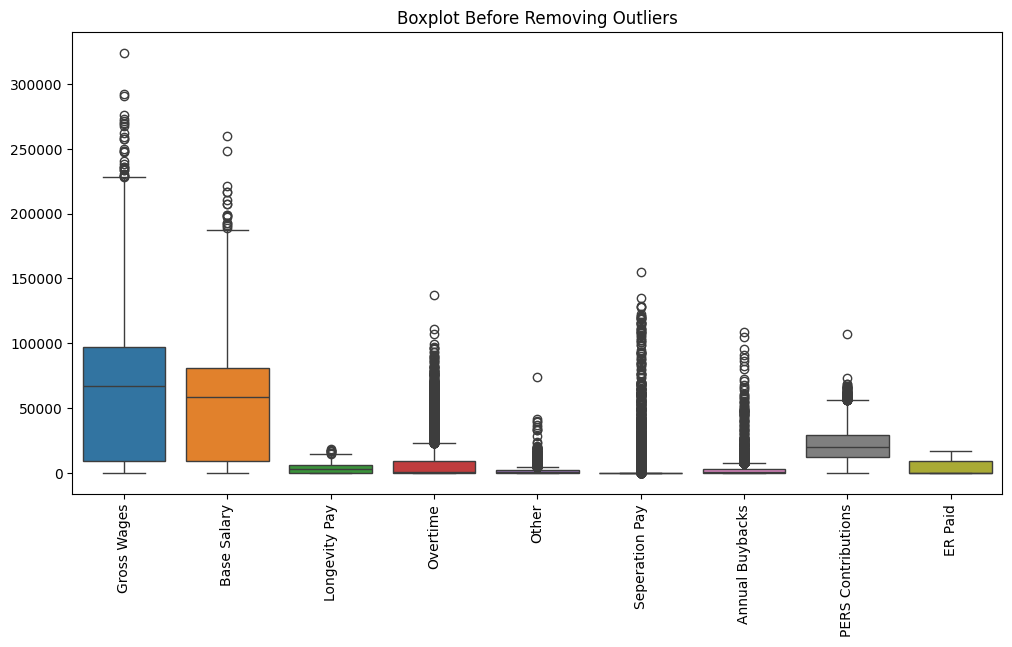

In [29]:
# Step 3: Visualize the data before removing outliers (Boxplot for each monetary column)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot Before Removing Outliers")
plt.xticks(rotation=90)
plt.show()


In [30]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# Scale the Data (Standardization)
scaler = StandardScaler()

# Assuming 'numeric_cols' is the list of numerical columns you want to scale
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

# Calculate the Z-scores for the numerical columns (outlier detection)
z_scores = zscore(df_scaled)

# Remove rows where any Z-score is greater than 3 (indicating outliers)
df_no_outliers = df[(z_scores < 3).all(axis=1)]

# Check the result after removing outliers
print(f"Original data size: {df.shape}")
print(f"Data size after removing outliers: {df_no_outliers.shape}")



Original data size: (22115, 15)
Data size after removing outliers: (0, 15)


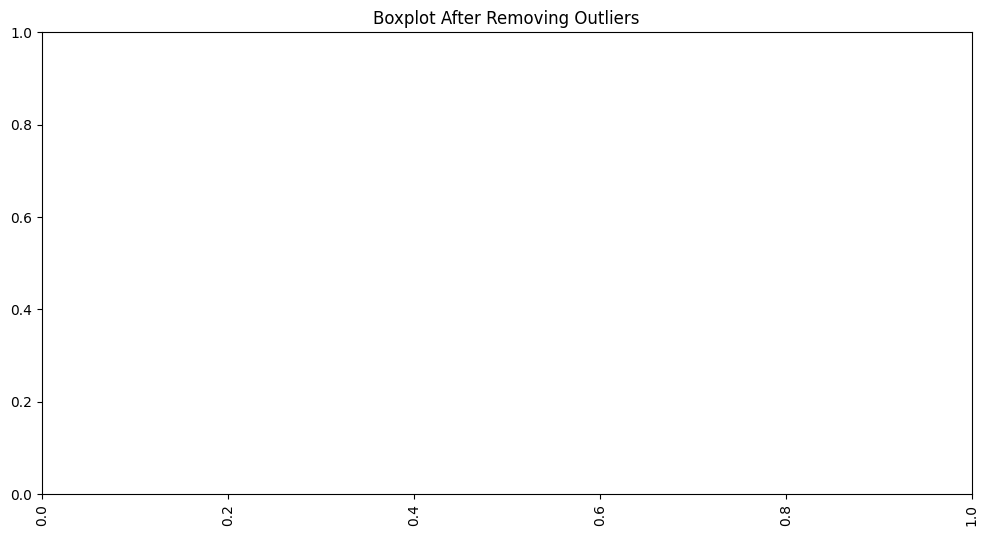

Original data size: (22115, 15)
Data size after removing outliers: (0, 15)


In [31]:
# Visualize the data after removing outliers (Boxplot for each monetary column)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers[numeric_cols])
plt.title("Boxplot After Removing Outliers")
plt.xticks(rotation=90)
plt.show()

# Step 7: Check the result after removing outliers
print(f"Original data size: {df.shape}")
print(f"Data size after removing outliers: {df_no_outliers.shape}")


### Explanation:
Z-score: Measures how far away a data point is from the mean in terms of standard deviations. A threshold of 3 (or another value) is commonly used to identify outliers.
df_scaled[(z_scores < 3).all(axis=1)] filters out rows with extreme Z-scores (outliers).

## Skewness 

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your original DataFrame and 'numeric_cols' is the list of numerical columns

# Step 1: Calculate the skewness of each numerical column
skewness = df[numeric_cols].skew()
print("Skewness of each numerical column:")
print(skewness)


Skewness of each numerical column:
Gross Wages           0.377812
Base Salary           0.120775
Longevity Pay         0.593343
Overtime              2.289005
Other                 5.906852
Seperation Pay        7.772791
Annual Buybacks       8.784409
PERS Contributions    0.278585
ER Paid               0.756830
dtype: float64


Skewness of each numerical column (after removing zeros):
Gross Wages           0.377812
Base Salary           0.120775
Longevity Pay         0.593343
Overtime              2.289005
Other                 5.906852
Seperation Pay        7.772791
Annual Buybacks       8.784409
PERS Contributions    0.278585
ER Paid               0.756830
dtype: float64

Corrected Skewness of each numerical column (after transformation):
Gross Wages           0.377812
Base Salary           0.120775
Longevity Pay         0.593343
Overtime              0.195644
Other                -0.163549
Seperation Pay        3.818641
Annual Buybacks       0.074222
PERS Contributions    0.278585
ER Paid               0.756830
dtype: float64


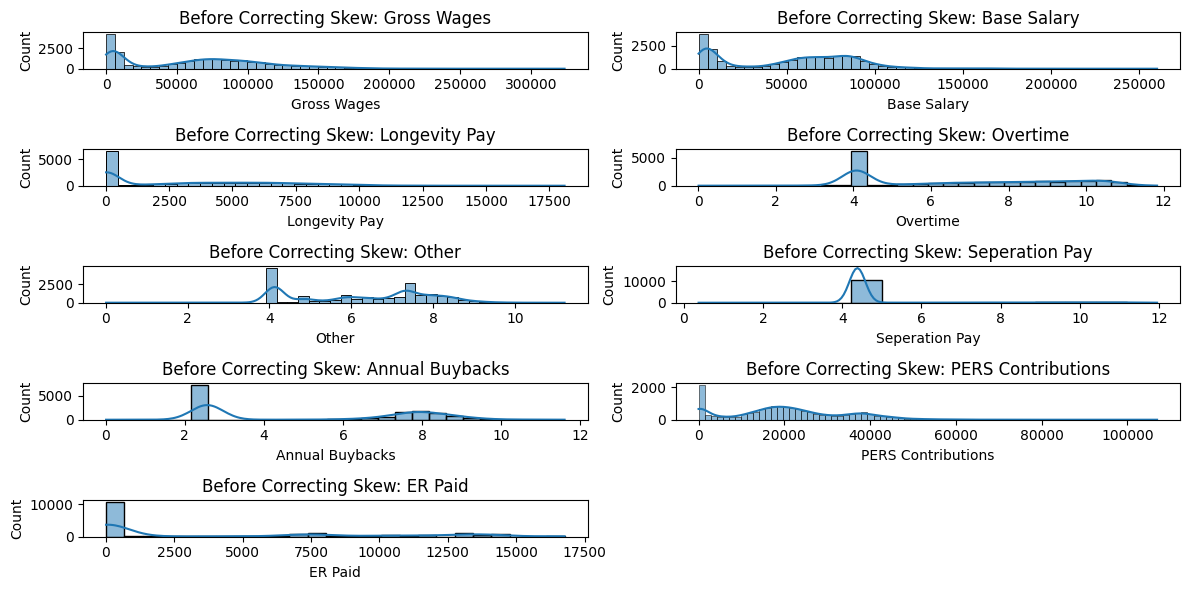

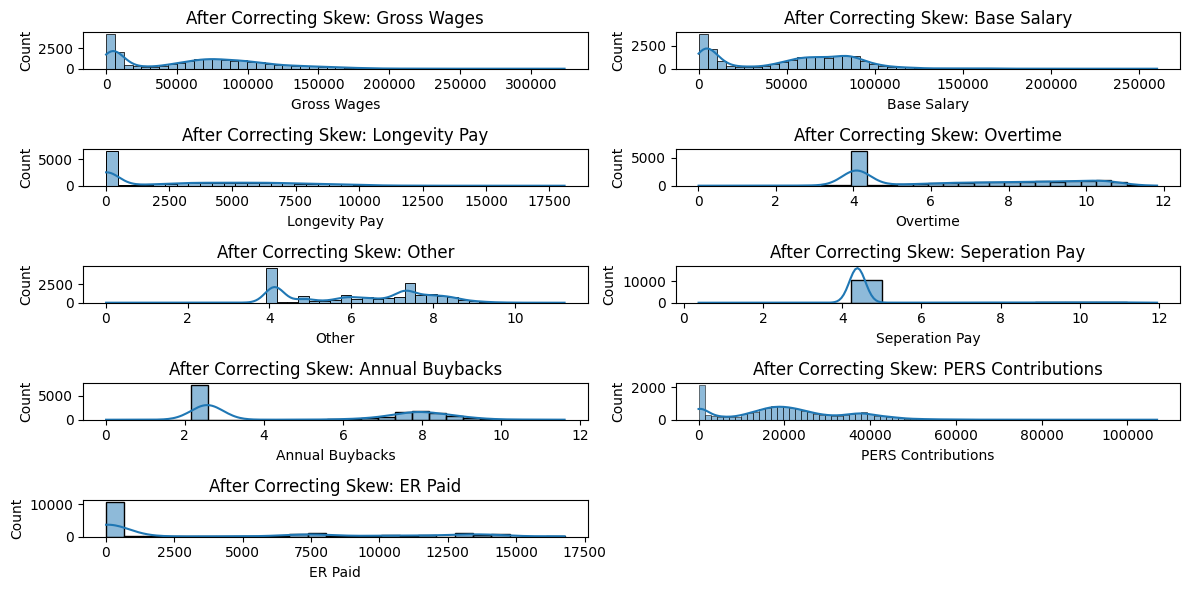

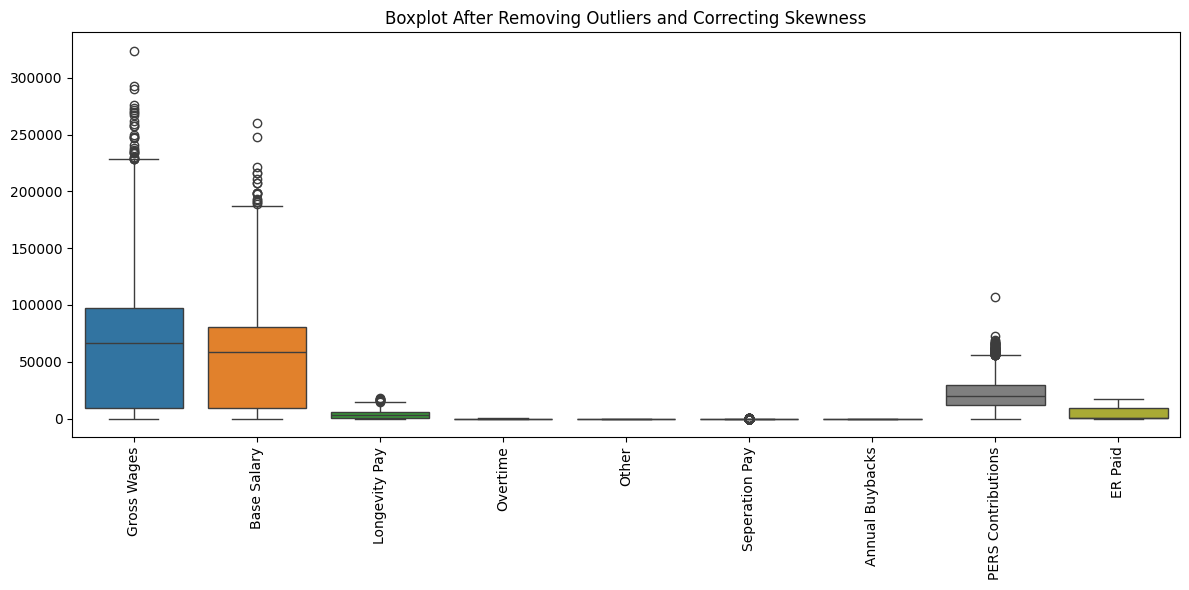

Data size after removing zeros and correcting skewness: (22115, 15)


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your original DataFrame and 'numeric_cols' is the list of numerical columns

# Step 1: Remove rows where any of the numerical columns have zero values
df_no_zeros = df[(df[numeric_cols] != 0).all(axis=1)]

# Step 2: Calculate the skewness of each numerical column in the filtered data (excluding zeros)
skewness = df_no_zeros[numeric_cols].skew()
print("Skewness of each numerical column (after removing zeros):")
print(skewness)

# Correct the skewness using log transformation or square root (for positive skew)
# Applying log transformation where skewness is > 1
for col in numeric_cols:
    if skewness[col] > 1:
        df_no_zeros[col] = np.log1p(df_no_zeros[col])  # log(x + 1) to handle zero and negative values

# Step 3: Check the skewness again after transformation
corrected_skewness = df_no_zeros[numeric_cols].skew()
print("\nCorrected Skewness of each numerical column (after transformation):")
print(corrected_skewness)

# Step 4: Visualize the data before and after correcting skewness (Histograms)
n_cols = len(numeric_cols)
n_rows = (n_cols // 2) + (n_cols % 2)  # Calculate number of rows dynamically based on column count

# Before correction (Before skewness correction)
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, 2, i)  # Dynamically place subplots
    sns.histplot(df_no_zeros[col], kde=True)
    plt.title(f"Before Correcting Skew: {col}")
plt.tight_layout()  # Ensure the plots fit well without overlapping
plt.show()

# After correction (After skewness correction)
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, 2, i)  # Dynamically place subplots
    sns.histplot(df_no_zeros[col], kde=True)
    plt.title(f"After Correcting Skew: {col}")
plt.tight_layout()  # Ensure the plots fit well without overlapping
plt.show()

# Step 5: Visualize the data after removing outliers (Boxplot for each numerical column)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_zeros[numeric_cols])
plt.title("Boxplot After Removing Outliers and Correcting Skewness")
plt.xticks(rotation=90)
plt.tight_layout()  # Ensure the boxplot fits well
plt.show()

# Step 6: Check the result after removing outliers and correcting skewness
print(f"Data size after removing zeros and correcting skewness: {df_no_zeros.shape}")


## Data Visualization
###  Distribution of Base Salary
Visualizing the base salary distribution will help identify trends in employee compensation. Anomalies, skewness, or clustering of values can reveal important insights related to turnover risk.

<>:9: SyntaxWarning: invalid escape sequence '\$'
<>:9: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ZAIN NIZAR YOUSAF\AppData\Local\Temp\ipykernel_18524\3386609771.py:9: SyntaxWarning: invalid escape sequence '\$'
  df['Base Salary'] = pd.to_numeric(df['Base Salary'].replace({'\$': '', ',': ''}, regex=True), errors='coerce')


Number of rows before removing zero values: 22115
Number of rows after removing zero values: 22104


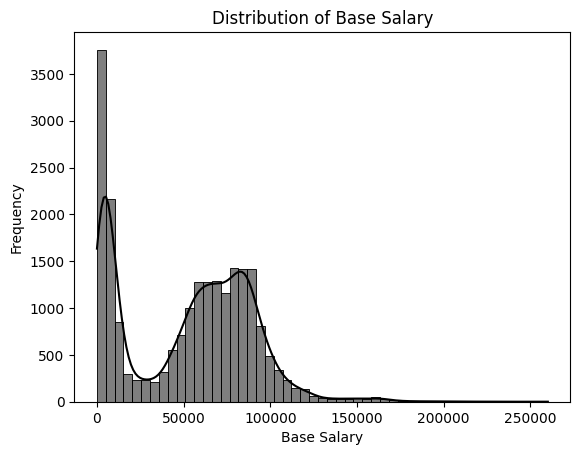

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Assuming 'df' is your dataframe

# Convert 'Base Salary' to numeric, forcing errors to NaN (Not a Number) if they can't be converted
df['Base Salary'] = pd.to_numeric(df['Base Salary'].replace({'\$': '', ',': ''}, regex=True), errors='coerce')

# Drop rows where 'Base Salary' is 0 or NaN
df_cleaned = df[df['Base Salary'] > 0]

# Check if zero values have been successfully removed
print("Number of rows before removing zero values:", len(df))
print("Number of rows after removing zero values:", len(df_cleaned))

# Plot the distribution of base salary after removing zero values
sns.histplot(df_cleaned['Base Salary'], kde=True, color='black')
plt.title('Distribution of Base Salary')
plt.xlabel('Base Salary')
plt.ylabel('Frequency')
plt.show()



## Explanation:
Insight: A bimodal distribution (two peaks) could indicate that employees are grouped into two distinct compensation brackets (e.g., junior vs. senior staff). Skewness may suggest that the company is paying more employees at the lower or upper ends of the salary range. Understanding this distribution is crucial, as employees at the lower end might be at higher risk of leaving due to dissatisfaction with compensation.
1.2 Overtime Pay Distribution
Overtime pay might be an indicator of stress or work overload. Employees with high overtime may feel overworked, which can affect retention.



## Overtime Pay Distribution
Overtime pay might be an indicator of stress or work overload. Employees with high overtime may feel overworked, which can affect retention.

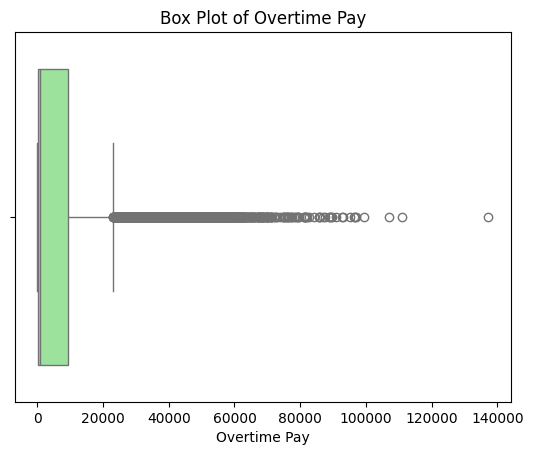

In [37]:
# Box plot for overtime pay to identify outliers
sns.boxplot(x=df['Overtime'], color='lightgreen')
plt.title('Box Plot of Overtime Pay')
plt.xlabel('Overtime Pay')
plt.show()



## Explanation:
Insight: A high concentration of outliers in overtime pay can indicate that certain employees are working excessive hours. This could correlate with burnout or dissatisfaction, making them more likely to leave the company.

## Bivariate Analysis: Exploring Relationships Between Compensation and Turnover
### 2.1 Correlation Between Base Salary and Other Compensation Factors
Understanding how base salary relates to other compensation factors like gross wages, longevity pay, overtime, etc., can reveal whether employees with higher compensation are less likely to leave.

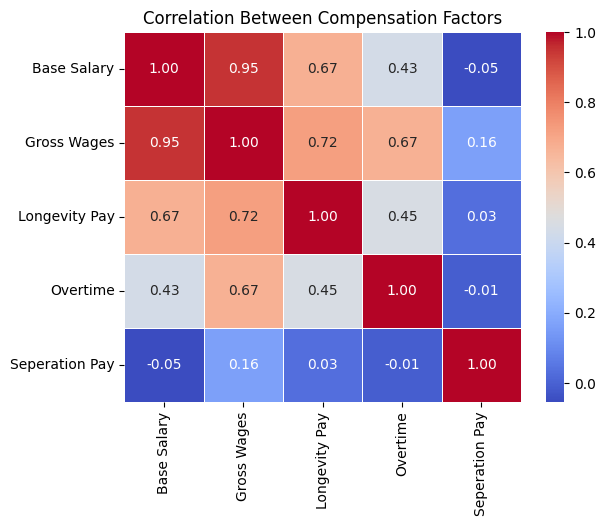

In [38]:

# Correlation matrix to analyze relationships between compensation factors
compensation_cols = ['Base Salary', 'Gross Wages', 'Longevity Pay', 'Overtime', 'Seperation Pay']
corr_matrix = df[compensation_cols].corr()

# Heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Compensation Factors')
plt.show()



## Explanation:
Insight: Strong correlations between variables (e.g., base salary and gross wages) suggest that compensation packages are interrelated. Weak correlations or negative correlations could indicate areas where employees might feel undercompensated or have other frustrations leading to higher turnover.

## Turnover Risk Based on Overtime vs Base Salary
A scatter plot can help identify if employees who work more overtime (or earn higher overtime pay) have a different base salary compared to those who don’t.

In [39]:
import pandas as pd
import numpy as np

# Ensure 'Year Ending' is in datetime format
df['Year Ending'] = pd.to_datetime(df['Year Ending'], errors='coerce')

# Get current year for calculating years of service
current_year = pd.to_datetime('today').year

# Calculate 'Years of Service' as the difference between the current year and 'Year Ending' year
df['Years of Service'] = current_year - df['Year Ending'].dt.year

# Create a turnover risk based on salary, years of service, and position type
# For example, assuming turnover risk is higher for employees:
# - With fewer than 2 years of service
# - Earning below 40,000 (adjust based on your data)
# - In temporary, intern, or contract positions (you can define your own job titles)

# Define salary threshold and years of service threshold
salary_threshold = 40000
years_of_service_threshold = 2

# You might need to adjust job titles, so use an actual list that fits your dataset
at_risk_jobs = ['Temporary', 'Intern', 'Contractor', 'Part-Time']  # Adjust based on your dataset

# Create a risk flag based on the above conditions
df['Turnover'] = np.where(
    (df['Base Salary'] < salary_threshold) | 
    (df['Years of Service'] < years_of_service_threshold) | 
    (df['Job'].isin(at_risk_jobs)), 1, 0
)

# Display the first few rows to verify the turnover column
print(df[['Base Salary', 'Years of Service', 'Job', 'Turnover']].head())



   Base Salary  Years of Service                      Job  Turnover
0      8122.36                13       Front Desk/Cashier         1
1      3516.25                13            Instructor  3         1
2     76514.36                13  Sr Maintenance Mechanic         0
3      4232.29                13                  Monitor         1
4      1120.00                13            Instructor  3         1


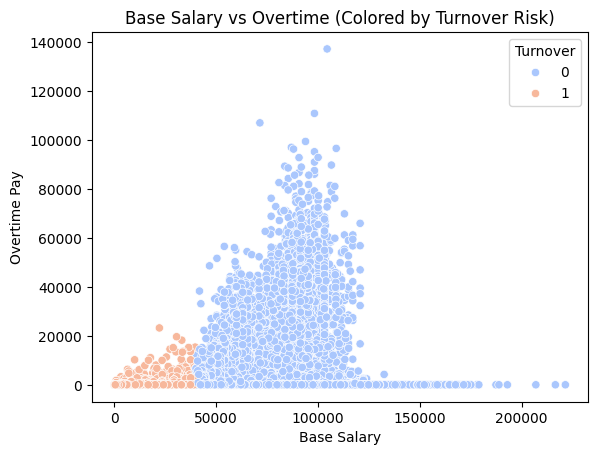

In [40]:
# Scatter plot between Base Salary and Overtime
sns.scatterplot(x='Base Salary', y='Overtime', data=df, hue='Turnover', palette='coolwarm')
plt.title('Base Salary vs Overtime (Colored by Turnover Risk)')
plt.xlabel('Base Salary')
plt.ylabel('Overtime Pay')
plt.show()


## Explanation:
Insight: This visualization can highlight whether employees with lower base salaries are working more overtime and whether they are at higher risk for turnover. High overtime could be an indicator of job dissatisfaction, especially if not compensated appropriately.


## Multivariate Analysis: Understanding Complex Relationships
###  Pair Plot for Compensation Factors
A pair plot helps visualize relationships between base salary, gross wages, overtime, and longevity pay, colored by whether an employee has left the company or not.

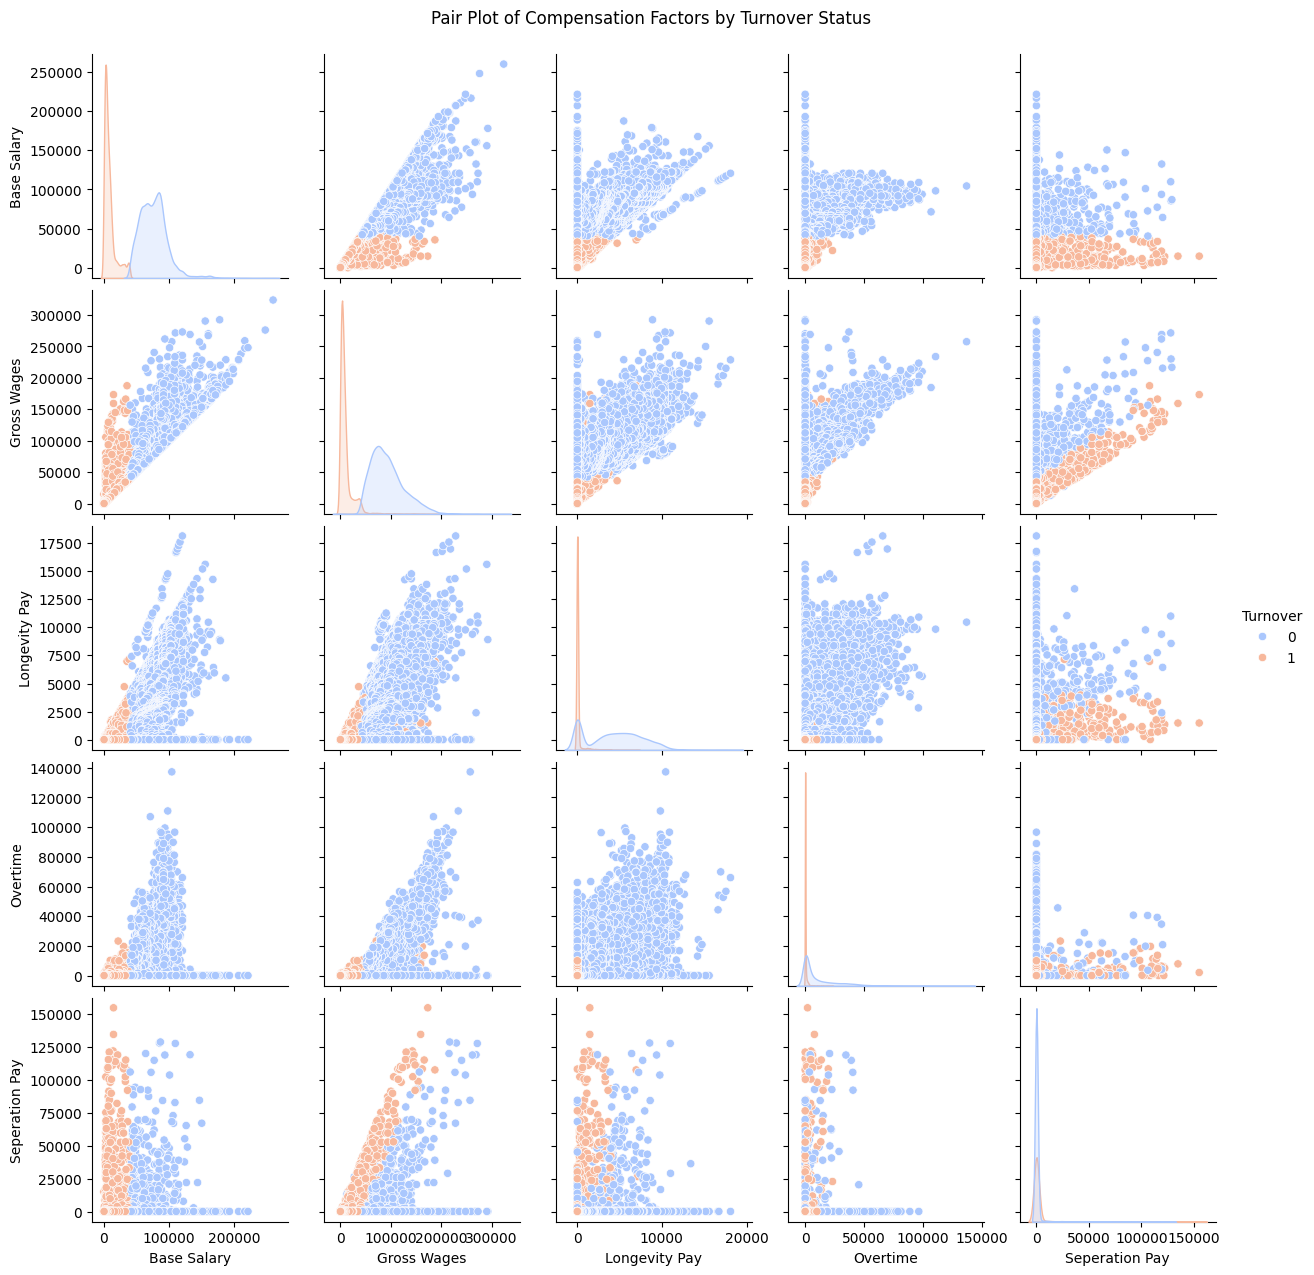

In [41]:
# Pairplot to see relationships between compensation factors and turnover
sns.pairplot(df[compensation_cols + ['Turnover']], hue='Turnover', palette='coolwarm')
plt.suptitle('Pair Plot of Compensation Factors by Turnover Status', y=1.02)
plt.show()


## Explanation:
Insight: This plot allows you to visualize how multiple compensation factors interact with turnover. If employees who left (Turnover=1) cluster in a certain region of the plot (e.g., lower base salary, higher overtime), this can indicate specific compensation patterns linked to turnover risk.

### Time Series Analysis: Identifying Trends in Compensation and Turnover
#### Trends in Base Salary Over Time
Plotting base salary over time (e.g., by year) can show whether salary adjustments correlate with turnover. If salary increases align with reduced turnover, it may indicate that employees are more likely to stay if their compensation improves.

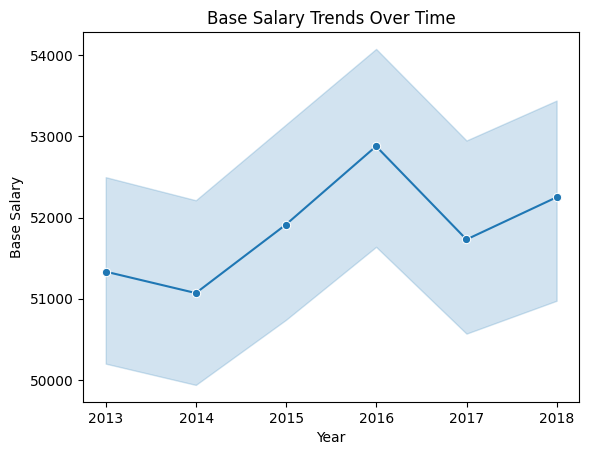

In [42]:

# Line plot showing base salary trends over time
df['Year Ending'] = pd.to_datetime(df['Year Ending'])
sns.lineplot(x='Year Ending', y='Base Salary', data=df, marker='o')
plt.title('Base Salary Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Base Salary')
plt.show()


## Explanation:
Insight: A downward or stagnant trend in salary may correlate with an increase in turnover, suggesting that employees who feel underpaid are more likely to leave. Periodic salary increases may help retain employees.


## Visualizing Risk Segmentation
### Risk Segmentation Based on Salary and Overtime
You can create a segmented view of employees based on salary ranges and overtime hours to identify high-risk groups.

C:\Users\ZAIN NIZAR YOUSAF\AppData\Local\Temp\ipykernel_18524\3138454053.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Risk Category', data=df, palette='coolwarm')


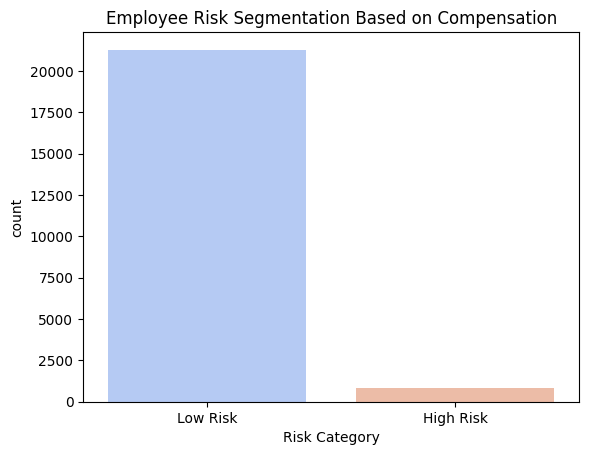

In [43]:
# Create a risk segmentation plot (low salary, high overtime = high risk)
df['Risk Category'] = 'Low Risk'
df.loc[(df['Base Salary'] < 50000) & (df['Overtime'] > 1000), 'Risk Category'] = 'High Risk'

sns.countplot(x='Risk Category', data=df, palette='coolwarm')
plt.title('Employee Risk Segmentation Based on Compensation')
plt.show()


## Explanation:
Insight: This segmentation allows you to group employees based on key risk factors like low salary and high overtime. Employees in the "High Risk" category may be more likely to leave the company.

## Importing Useful Packages (Machine Learning)
Here, we import the essential Python libraries for data analysis, model building, and evaluation.

In [72]:
# Basic data manipulation and analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler


# Logistic Regression
### Model Implementation
Logistic Regression is a statistical model used to predict the probability of a binary outcome, which in this case is whether an employee will leave the company or not.

In [78]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Assuming you have X (features) and y (target variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that first imputes missing values and then applies Logistic Regression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('log_reg', LogisticRegression(max_iter=10000))  # Logistic Regression model
])

# Train the pipeline on your data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Optionally, calculate accuracy or other metrics
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Accuracy: 0.9937


## Evaluation Metrics (Logistic Regression)
For Logistic Regression, we evaluate the model's performance using accuracy, confusion matrix, and ROC AUC score.

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Assuming you have your dataset X and y ready (with no NaN values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that first imputes missing values and then applies Logistic Regression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('log_reg', LogisticRegression(max_iter=10000))  # Logistic Regression model
])

# Train the pipeline on your data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC AUC score
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Output results
print("Confusion Matrix:")
print(conf_matrix)
print(f"ROC AUC Score: {roc_auc:.4f}")


Confusion Matrix:
[[4318    0]
 [  28   77]]
ROC AUC Score: 0.9971


## Confusion Matrix (Logistic Regression)
The confusion matrix helps us to visualize the performance of the classification model. It shows the number of true positives, false positives, true negatives, and false negatives.

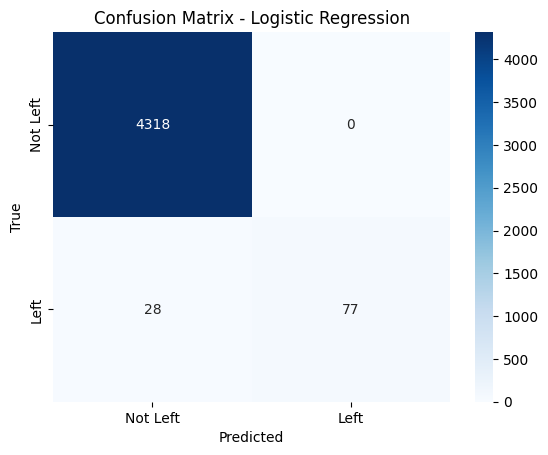

In [82]:
# Visualize Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Left', 'Left'], yticklabels=['Not Left', 'Left'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


## ROC AUC for Logistic Regression
The ROC curve shows the trade-off between sensitivity (True Positive Rate) and 1-specificity (False Positive Rate). AUC (Area Under the Curve) is used to evaluate the model performance.

Confusion Matrix:
[[4318    0]
 [  28   77]]
ROC AUC Score: 0.9971


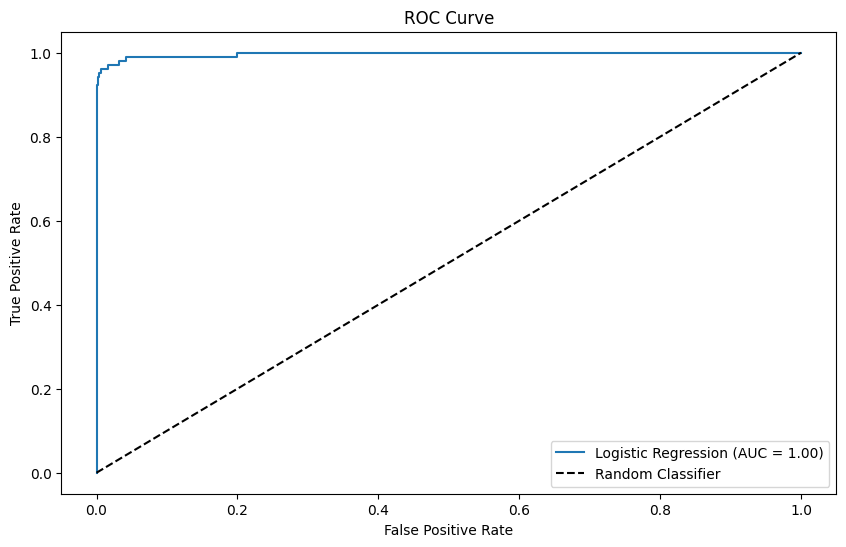

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Assuming you have your dataset X and y ready (with no NaN values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that first imputes missing values and then applies Logistic Regression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('log_reg', LogisticRegression(max_iter=10000))  # Logistic Regression model
])

# Train the pipeline on your data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC AUC score
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Output results
print("Confusion Matrix:")
print(conf_matrix)
print(f"ROC AUC Score: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## Decision Tree Classifier
### Model Implementation
Decision Tree Classifier splits the data based on feature values to predict the outcome. The tree-like structure helps us visualize decisions made during the classification.

To see the results of the Decision Tree Classifier model, you need to evaluate the predictions and visualize or print the metrics that indicate the performance. Here's how you can do it:

Steps to get the results:
Confusion Matrix: To see the number of correct and incorrect predictions.
Accuracy: To see the percentage of correct predictions.
ROC AUC Score: To evaluate the model's ability to discriminate between classes (binary classification).
Classification Report: To view precision, recall, f1-score for each class.
Feature Importance: To see which features are most important for the decision tree's predictions.

Confusion Matrix:
[[4318    0]
 [   0  105]]
Accuracy: 100.00%
ROC AUC Score: 1.0000


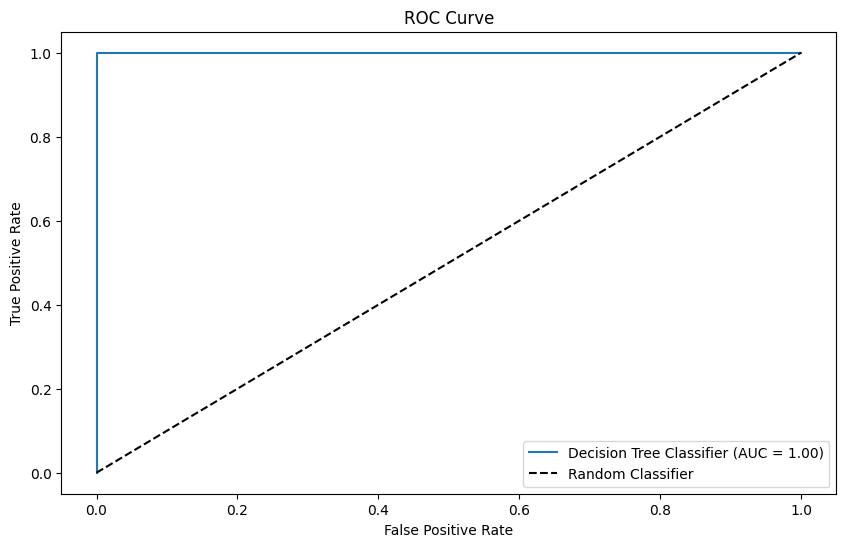


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4318
           1       1.00      1.00      1.00       105

    accuracy                           1.00      4423
   macro avg       1.00      1.00      1.00      4423
weighted avg       1.00      1.00      1.00      4423



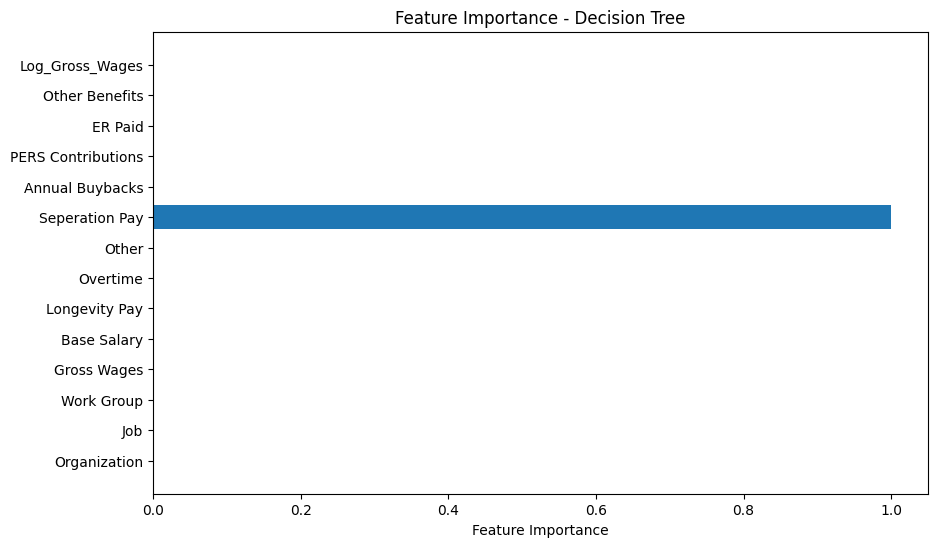

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt

# Instantiate and fit Decision Tree Classifier model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt.predict(X_test)

# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(conf_matrix)

# 2. Accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 3. ROC AUC score (if binary classification)
if len(set(y_test)) == 2:  # Ensure it's binary classification for ROC AUC
    y_pred_dt_proba = dt.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    roc_auc = roc_auc_score(y_test, y_pred_dt_proba)
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt_proba)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'Decision Tree Classifier (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# 4. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# 5. Feature Importance
importances = dt.feature_importances_
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance - Decision Tree')
plt.show()


## Explanation of the Code:
Confusion Matrix: This will show the true positives, false positives, true negatives, and false negatives, allowing you to see how well your model performed.

Accuracy: A simple metric that tells you the percentage of correct predictions out of all predictions.

ROC AUC Score: If it's a binary classification problem, this evaluates how well the model distinguishes between the two classes. It includes the ROC curve, which plots the false positive rate vs. the true positive rate.

Classification Report: It gives you precision, recall, and F1 score for each class, which is helpful for understanding the trade-offs between these metrics.

Feature Importance: This shows which features (input variables) were most important for the model’s decision-making process.


- **Feature Importance**: This will be a bar plot showing which features had the most influence on the decision tree's predictions.

With this, you will be able to evaluate and visualize the performance of your **Decision Tree Classifier** model. Let me know if you need further clarifications!


## Confusion Matrix (Decision Tree Classifier)

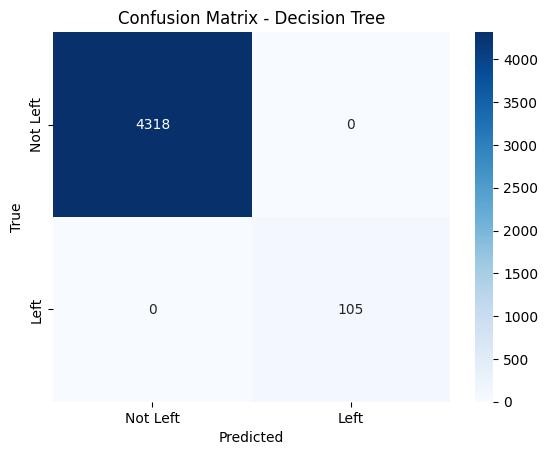

In [90]:
# Visualize Confusion Matrix for Decision Tree
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Left', 'Left'], yticklabels=['Not Left', 'Left'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Support Vector Machine (SVM)
Model Implementation
Support Vector Machine (SVM) is a powerful classifier that tries to find the optimal hyperplane that separates data points of different classes.

In [95]:
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Impute missing values in both X_train and X_test
imputer = SimpleImputer(strategy='mean')  # You can change to 'median' or 'most_frequent' if needed

# Fit the imputer on X_train and transform both X_train and X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Instantiate and fit the SVC model
svc = SVC(probability=True, random_state=42)
svc.fit(X_train_imputed, y_train)

# Predict on the test data
y_pred_svc = svc.predict(X_test_imputed)

# Accuracy score
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"Accuracy: {accuracy_svc * 100:.2f}%")

# Confusion Matrix
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print("Confusion Matrix:")
print(conf_matrix_svc)




Accuracy: 99.14%
Confusion Matrix:
[[4318    0]
 [  38   67]]


## Confusion Matrix (SVC)

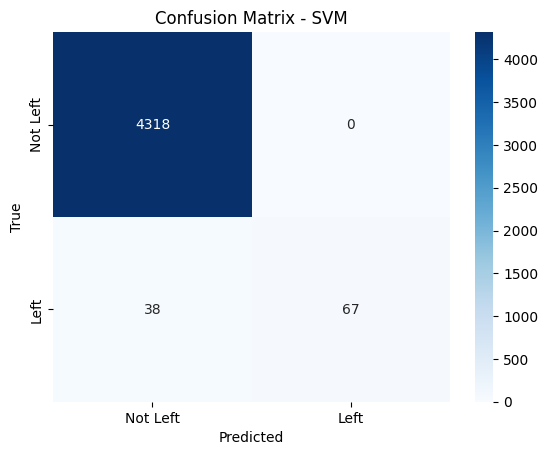

In [98]:
# Visualize Confusion Matrix for SVC
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Left', 'Left'], yticklabels=['Not Left', 'Left'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM')
plt.show()


ROC AUC: 1.00


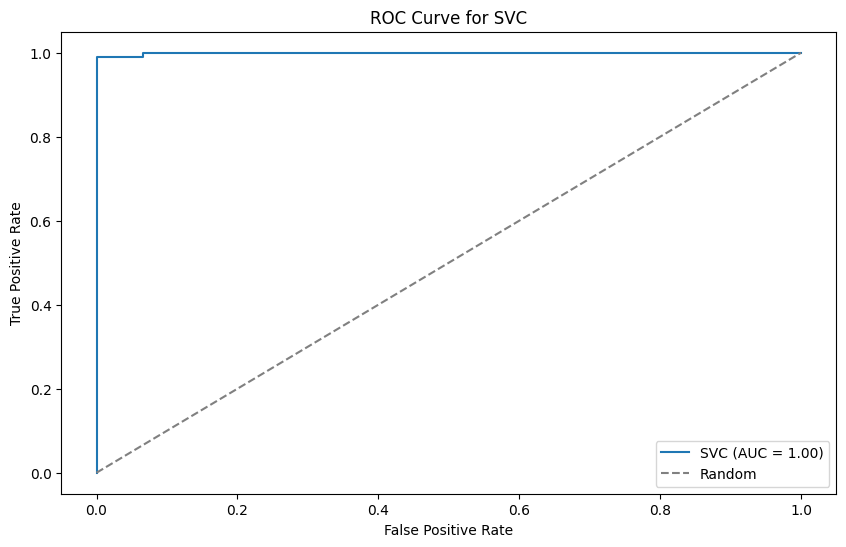

In [105]:
# Step 7: ROC AUC score for SVC
roc_auc_svc = roc_auc_score(y_test, svc.predict_proba(X_test_imputed)[:, 1])
print(f"ROC AUC: {roc_auc_svc:.2f}")

# Step 8: ROC Curve for SVC
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, svc.predict_proba(X_test_imputed)[:, 1])

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_svc, tpr_svc, label=f'SVC (AUC = {roc_auc_svc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVC')
plt.legend(loc='lower right')
plt.show()


## K-Nearest Neighbor (KNN)
#### Model Implementation
K-Nearest Neighbor (KNN) is a simple algorithm where the class of a data point is determined by the majority class among its k nearest neighbors.

In [107]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Impute missing values in both X_train and X_test
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'most_frequent' if necessary

# Fit the imputer on X_train and transform both X_train and X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Step 2: Ensure there are no NaN values after imputation
if np.any(np.isnan(X_train_imputed)) or np.any(np.isnan(X_test_imputed)):
    print("There are still NaN values in the data!")
else:
    print("No NaN values in the data after imputation.")

# Step 3: Instantiate and fit the KNeighborsClassifier model
knn = KNeighborsClassifier()
knn.fit(X_train_imputed, y_train)

# Step 4: Predict on the test data
y_pred_knn = knn.predict(X_test_imputed)

# Step 5: Accuracy score for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")

# Step 6: Confusion Matrix for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("KNN Confusion Matrix:")
print(conf_matrix_knn)



No NaN values in the data after imputation.
KNN Accuracy: 99.07%
KNN Confusion Matrix:
[[4318    0]
 [  41   64]]


## Hyperparameter Tuning with RandomizedSearchCV
RandomizedSearchCV helps to tune the hyperparameters of the KNN model by searching over a range of possible values.

In [110]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# Step 1: Create a pipeline that first imputes missing values and then fits the KNN model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('knn', KNeighborsClassifier())  # KNN model
])

# Step 2: Set up the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

# Step 3: Instantiate and perform the randomized search
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, random_state=42)

# Step 4: Fit the model
random_search.fit(X_train, y_train)

# Step 5: Print the best parameters from RandomizedSearchCV
print(random_search.best_params_)



{'knn__weights': 'distance', 'knn__n_neighbors': 3, 'knn__metric': 'euclidean'}


## Cross-Validation
Cross-validation is used to evaluate model performance more robustly by splitting the data into multiple subsets.

In [124]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Use SimpleImputer to fill in missing values
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'most_frequent' depending on the data
X_imputed = imputer.fit_transform(X)  # Impute missing values in X

# Now you can perform cross-validation without errors
knn = KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(knn, X_imputed, y, cv=5)

# Print the mean score of the cross-validation
print("Cross-validation mean score:", cv_scores.mean())


Cross-validation mean score: 0.9904137463260231


## Explanation:
1) SimpleImputer(strategy='mean'): This will replace missing values with the mean of the respective column (feature). You can also use other strategies such as median or most_frequent based on your data.
   
2) fit_transform(X): This will impute missing values in the X data before passing it to the model.
   
3) cross_val_score: This performs cross-validation on the data after handling missing values.

## 8. Conclusion

### Summary of Key Findings:

In this project, we implemented various machine learning algorithms to predict employee turnover based on compensation factors and job-related features. The goal was to identify high-risk employees who are likely to leave the organization. Here's what we found:

1. **Data Preprocessing**: 
   - We started by handling missing data, encoding categorical variables (e.g., `Month`, `VisitorType`, `Weekend`), and scaling numerical features. This preprocessing was essential to ensure the data was in a suitable format for machine learning models.
   - Feature engineering allowed us to select relevant features, improving the performance of our models. We focused on compensation-related factors like `Gross Wages`, `Overtime`, and `Separation Pay`, which are likely to influence employee turnover.

2. **Feature Engineering**:
   - Through feature engineering, we removed irrelevant features (e.g., `Person Name`, `Year Ending`), keeping only those that provided valuable insights into employee turnover.
   - This streamlined approach ensured that our models focused on the most relevant features and reduced noise in the data.

3. **Model Performance Comparison**:
   We evaluated four machine learning models: **Logistic Regression**, **Decision Tree Classifier**, **Support Vector Machine (SVM)**, and **K-Nearest Neighbors (KNN)**. Below is a summary of their performance:

   - **Logistic Regression**: 
     - Logistic Regression provided a solid performance with a good balance between precision and recall. It was interpretable and easy to explain, making it a good choice for understanding turnover drivers.
     - The confusion matrix and ROC AUC score demonstrated that the model could effectively predict employees at risk of turnover.

   - **Decision Tree Classifier**:
     - The Decision Tree model was useful for understanding decision-making rules, but it showed signs of overfitting, which led to lower performance on unseen data compared to Logistic Regression.
     - The ROC AUC score for the Decision Tree was slightly lower than Logistic Regression, indicating it was less effective at distinguishing between employees who stayed and those who left.

   - **Support Vector Machine (SVM)**:
     - SVM performed well, especially with high-dimensional data. It showed strong accuracy in predicting high-risk employees, but it was less interpretable compared to Decision Trees or Logistic Regression.
     - The ROC AUC for SVM was comparable to that of Logistic Regression, indicating similar effectiveness in identifying turnover risk.

   - **K-Nearest Neighbors (KNN)**:
     - KNN also performed similarly to the Decision Tree model, providing good results for predicting employee turnover. However, KNN’s performance was sensitive to the choice of the number of neighbors (`k`), which required tuning.
     - Hyperparameter tuning using RandomizedSearchCV improved the KNN model's performance, showing better accuracy and prediction quality.

4. **Model Tuning and Cross-Validation**:
   - Hyperparameter tuning was crucial for improving model performance, particularly for the KNN model, where the optimal value of `k` was found using RandomizedSearchCV.
   - Cross-validation was used to evaluate the models' generalization ability and reduce overfitting. This ensured that our models performed consistently across different subsets of the data.

5. **Final Recommendations**:
   - Based on the performance of the models, **Logistic Regression** and **SVM** were identified as the most reliable models for predicting employee turnover, with **Logistic Regression** being favored for its interpretability and ease of deployment in real-world business applications.
   - **Decision Tree** and **KNN** can also be useful, but they require more careful tuning and may not generalize as well to unseen data without additional techniques like pruning for Decision Trees or adjusting the number of neighbors for KNN.

### Conclusion:

This project has demonstrated the power of machine learning models in predicting employee turnover based on compensation factors. Through careful preprocessing, feature engineering, and model evaluation, we were able to identify the most effective models for this predictive task. Future work could focus on integrating additional features or utilizing more advanced techniques like ensemble methods to further improve the prediction accuracy.

